# **Principio de inversión de dependencia (DIP:Dependency inversion principle)**
[¿Qué es DIP?](https://es.wikipedia.org/wiki/Principio_de_inversi%C3%B3n_de_la_dependencia)

Este principio establece que los módulos de alto nivel no deben depender de módulos de bajo nivel.

Ambos deben depender de abstracciones.

Además, las abstracciones no deben depender de los detalles. Los detalles deben depender de las abstracciones.

**“Depender de abstracciones, no depender de implementaciones”**

En el diseño orientado a objetos, el principio de inversión de dependencia es una forma específica de desacoplar módulos de software.

Al seguir este principio, las relaciones de dependencia convencionales establecidas desde los módulos de alto nivel de establecimiento de políticas a los módulos de dependencia de bajo nivel se invierten, lo que hace que los módulos de alto nivel sean independientes de los detalles de implementación del módulo de bajo nivel.

El principio establece:

* Los módulos de alto nivel no deberían depender de los módulos de bajo nivel. Ambos deberían depender de abstracciones (p.ej., interfaces).

* Las abstracciones no deberían depender de los detalles. Los detalles (implementaciones concretas) deben depender de abstracciones.

**Ejemplo Inyección de Dependencia:**

Supongamos que tenemos una clase CorreoElectronico que necesita enviar mensajes.

En lugar de instanciar directamente un objeto de la clase ServidorCorreo dentro de la clase CorreoElectronico, podríamos hacer que la clase CorreoElectronico dependa de una interfaz ProveedorCorreo.

Luego, podríamos inyectar una implementación concreta de ProveedorCorreo (como ServidorCorreo) en la clase CorreoElectronico a través de su constructor o un método setter.

In [ ]:
class IProveedorCorreo:
    def enviar_mensaje(self, mensaje):
        pass

class ServidorCorreo(IProveedorCorreo):
    def enviar_mensaje(self, mensaje):
        print("Enviando mensaje:", mensaje)

class CorreoElectronico:
    def __init__(self, iproveedor_correo: IProveedorCorreo):
        self.iproveedor_correo = iproveedor_correo

    def enviar(self, mensaje):
        self.iproveedor_correo.enviar_mensaje(mensaje)

In [ ]:
# Uso de la inyección de dependencia
proveedor_correo = ServidorCorreo()
correo = CorreoElectronico(proveedor_correo)
correo.enviar("¡Hola!")

Enviando mensaje: ¡Hola!


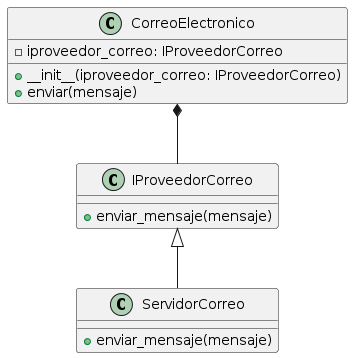

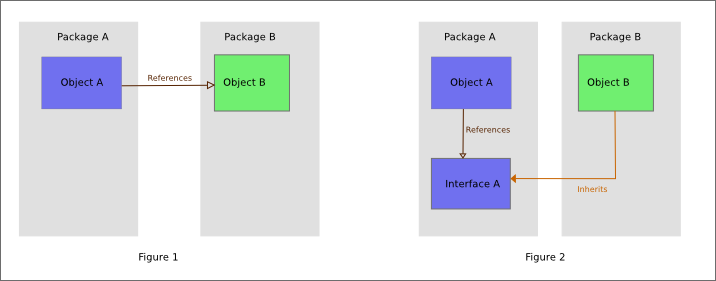
  
)

In [ ]:
class ClaseA:
    def __init__(self):
        self.claseB_instance = ClaseB()

    def usar_claseB(self):
        return self.claseB_instance.saludar()

In [ ]:
class ClaseB:
    def saludar(self):
        return "¡Hola desde ClaseB!"

In [ ]:
instanciaA = ClaseA()
    print(instanciaA.usar_claseB())

**Mejora con interfaces**

In [ ]:
# Package A
class InterfaceA:
    def metodo_a(self):
        pass


In [ ]:
# Package A
class ObjetoA:
    def __init__(self, interfaz_a):
        self.interfaz_a = interfaz_a

    def hacer_algo(self):
        self.interfaz_a.metodo_a()

In [ ]:
# Package B
class ObjetoB(InterfaceA):
    def metodo_a(self):
        print("Método A implementado en ObjetoB")


In [ ]:
objetob=ObjetoB()
objetoa=ObjetoA(objetob)
objetoa.hacer_algo()

Método A implementado en ObjetoB


In [ ]:
mi_proyecto/
├── paqueteA/
│   ├── __init__.py
│   └── claseA.py
├── paqueteB/
│   ├── __init__.py
│   └── claseB.py
├── interfaces/
│   ├── __init__.py
│   └── iclaseb.py
└── main.py


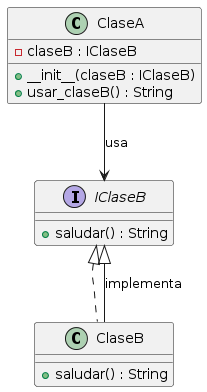

Para cumplir con ISP y DIP, definimos una interfaz para ClaseB.

In [ ]:
from abc import ABC, abstractmethod

class IClaseB(ABC):
    @abstractmethod
    def saludar(self):
        pass

Implementamos la interfaz IClaseB en ClaseB.

In [ ]:
class ClaseB(IClaseB):
    def saludar(self):
        return "¡Hola desde ClaseB!"

ClaseA ahora depende de la abstracción IClaseB, no de la implementación ClaseB.

In [ ]:
class ClaseA:
    def __init__(self, claseB: IClaseB):
        self.claseB = claseB

    def usar_claseB(self):
        return self.claseB.saludar()

In [ ]:
claseB = ClaseB()
claseA = ClaseA(claseB)

In [ ]:
claseA.usar_claseB()

'¡Hola desde ClaseB!'

# **Explicación de los Principios SOLID Aplicados:**

**Single Responsibility Principle (SRP):**

Cada clase tiene una única responsabilidad. ClaseA maneja la lógica de A y ClaseB maneja la lógica de B. La interfaz IClaseB define el contrato para ClaseB.

**Open/Closed Principle (OCP):**

Las clases están abiertas para extensión pero cerradas para modificación. Si necesitamos cambiar el comportamiento de ClaseB, podemos crear una nueva clase que implemente IClaseB sin modificar ClaseA.

**Liskov Substitution Principle (LSP):**

ClaseB puede reemplazar cualquier otra implementación de IClaseB sin alterar el comportamiento de ClaseA. Esto se garantiza mediante la interfaz IClaseB.

**Interface Segregation Principle (ISP):**

La interfaz IClaseB es específica y contiene solo lo necesario, permitiendo que ClaseA dependa de una interfaz más pequeña y enfocada.

**Dependency Inversion Principle (DIP):**

ClaseA depende de la abstracción IClaseB, no de la implementación concreta ClaseB. Esto permite una mayor flexibilidad y facilita el testeo y la inyección de dependencias.

**Beneficios:**

Modularidad: El código es más fácil de entender y mantener.
Reutilización: Las clases y las interfaces son reutilizables en otros contextos.
Testabilidad: Podemos mockear IClaseB para pruebas unitarias de ClaseA.

Este enfoque asegura que el código sea más robusto, fácil de mantener y extensible en el futuro.